In [197]:
# Logistic Regression with a Neural Network mindset
# Logistic regression classifier to recognize cats
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [200]:
def load_dataset (DataName):
    # the data format is data.h5
    dataset = h5py.File(DataName, "r")
    # look at the keys
    datasetKeys = list(dataset.keys())
    print('the list of dataset keys:', datasetKeys)
    set_x = np.array(dataset[datasetKeys[1]][:]) # set features
    set_y = np.array(dataset[datasetKeys[2]][:]) # set labels
    m = set_y.shape[0]
    set_y = set_y.reshape(1,m)  
    print('number of example: ', m)
    print('the shape of image:', set_x.shape)
    print('the shape of labes:', set_y.shape)
    
    num_px = set_x.shape[1]
    num_py = set_x.shape[2]
    num_ph = set_x.shape[3]
    print('the length of image:num_px', num_px)
    print('the width of image:num_py', num_py)
    print('the depth of image:num_ph', num_ph)

    return set_x, set_y

def image2vector(set_x):
    # set_x = (m,nx,ny,nh) ->set_x_flatten = (nx*ny*n,m)
    m = set_x.shape[0] # number of examples
    set_x_flatten = set_x.reshape(m,-1).T
    return set_x_flatten
    
def ini_param_to_zero (num_param):
    #initialize_with_zeros
    w = np.zeros((num_param,1))
    b = 0
    return w, b

def sigmoid (z):
    a = 1/(1+np.exp(-z))
    return a


def propagate(X, Y, w, b):
    # FORWARD PROPAGATION
    Z = np.dot(w.T,X) + b
    #activation function
    A = sigmoid(Z)
    m = X.shape[1]
    cost = -1/m * (np.dot(Y,(np.log(A).T))+ np.dot((1-Y),(np.log(1-A).T)))
    
    # BACKWARD PROPAGATION
    db = 1/m * np.sum (A-Y)
    dw = 1/m * np.dot(X,(A-Y).T)
    
    grads = {'dw':dw,
             'db': db}
    
    
    cost = np.squeeze(cost)
    return grads, cost

def optimize (X,Y, num_iterations, learning_rate):
    # print the cost in a list 
    costs = []
    n = X.shape[0]
    w, b = ini_param_to_zero (n)
    for i in range(num_iterations):
        grads, cost = propagate(X, Y, w, b)
        costs.append(cost)
        dw = grads['dw']
        db = grads['db']
        
        # update the learnings parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    params = {'w' : w,
              'b' : b}
    grads = {'dw' : dw,
             'db' : db}
    
    return params, grads, costs
        
        
def predict (X, w,b):
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    m =  X.shape[1]
    Y = np.zeros((1, m))
    # Convert probabilities A[0,i] to actual predictions p[0,i]
    for i in range(m):
        if A[0,i] <= 0.5:
            Y[0,i]=0
        else:
            Y[0,i]=1
            
    return Y
        
  
    

def main_func(num_iterations=2000, learning_rate=0.005):
    # pre-processing includes : 1-load data, 2-flatten data, 3-normalized data
    
    # step 1
    # import data
    print('load the train data')
    DataNameTrain = 'train_catvnoncat.h5'
    train_set_x_orig, train_set_y = load_dataset(DataNameTrain)
    print('____________________________________________________')
     
    
    ##look at the image
    index=26
    plt.imshow(train_set_x_orig[index])
    print("y = ",train_set_y[:, index])
    plt.show()
    
    # Step 2
    # flatten the matrix x, (nx*ny*nh,m)
    train_set_x_flatten = image2vector(train_set_x_orig)
    print('the shape of train set flatten',train_set_x_flatten.shape)
    
    # Step 3
    # normalized the data set
    train_set_x= train_set_x_flatten/255
    
    #  Logistic Regression, using a Neural Network mindset
    params, grads, costs = optimize (train_set_x,train_set_y, num_iterations, learning_rate)
    plt.plot(costs)
    plt.show()
    
    w = params['w']
    b = params['b']
    
    
    
    ### test the model
    # Step 1: load test data
    print('load the test data')
    DataNameTest = 'test_catvnoncat.h5'
    test_set_x_orig, test_set_y = load_dataset(DataNameTest)
    # Step 2 : flatten the matrix x, (nx*ny*nh,m)
    test_set_x_flatten = image2vector(test_set_x_orig)
    print('the shape of test set flatten',test_set_x_flatten.shape)
    # Step 3:  normalized the data set
    test_set_x= test_set_x_flatten/255
    
    #### check the accuracy of train
    Y_train_predict = predict (train_set_x, w,b)
    accuracy_train = 100 - np.mean(np.abs(Y_train_predict- train_set_y))*100
    print('the accuracy of train set is :', accuracy_train)
    
    #### check the accuracy of test set
    Y_test_predict = predict (test_set_x, w,b)
    accuracy_test = 100- np.mean(np.abs(Y_test_predict- test_set_y))*100
    print('the accuracy of test set is :', accuracy_test)
    
    
    
    
    
  
    
    


load the train data
the list of dataset keys: ['list_classes', 'train_set_x', 'train_set_y']
number of example:  209
the shape of image: (209, 64, 64, 3)
the shape of labes: (1, 209)
the length of image:num_px 64
the width of image:num_py 64
the depth of image:num_ph 3
____________________________________________________
y =  [0]


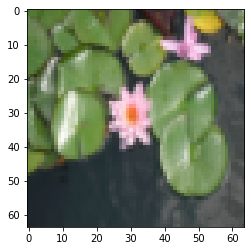

the shape of train set flatten (12288, 209)


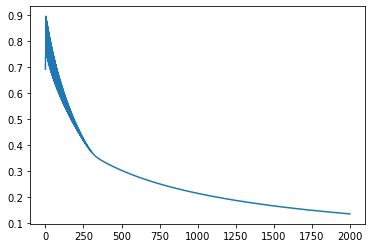

load the test data
the list of dataset keys: ['list_classes', 'test_set_x', 'test_set_y']
number of example:  50
the shape of image: (50, 64, 64, 3)
the shape of labes: (1, 50)
the length of image:num_px 64
the width of image:num_py 64
the depth of image:num_ph 3
the shape of test set flatten (12288, 50)
the accuracy of train set is : 99.04306220095694
the accuracy of test set is : 70.0


In [202]:

main_func()